<a href="https://colab.research.google.com/github/TAEO2474/python-dev/blob/main/405_pandas__%EC%83%81%EA%B6%8C%EB%B6%84%EC%84%9D_%EC%BB%A4%ED%94%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[공공데이터포털서울특별시(소상공인시장진흥공단_상가)]

https://www.data.go.kr/data/15083033/fileData.do

### 구글 코랩에서 한글 문제 해결
- 아래 코드 설치를 한다.
- 코랩 런타임 -> 런타임 다시 시작한다.

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

### 구글 드라이브 연동

In [2]:
from google.colab import drive
drive.mount('/content/drive')

%cd '/content/drive/MyDrive/2025AI'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/2025AI


폰트를 설치한 후에는 다음 명령으로 원하는 폰트가 설치되어 있는지 확인

In [3]:
import matplotlib.font_manager

sorted([ f.name for f in  matplotlib.font_manager.fontManager.ttflist if f.name.startswith('Nanum')])

['NanumBarunGothic',
 'NanumBarunGothic',
 'NanumGothic',
 'NanumGothic',
 'NanumGothicCoding',
 'NanumGothicCoding',
 'NanumMyeongjo',
 'NanumMyeongjo',
 'NanumSquare',
 'NanumSquare',
 'NanumSquareRound',
 'NanumSquareRound']

### import

In [4]:
import numpy as np
import pandas as pd
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns

그래프에서 한글이 깨지지 않도록 plt에  NanumBarunGothic 글꼴 설정

In [5]:
plt.rc('font', family='NanumBarunGothic')

그래프 축이 음수일때 정상적으로 표시되도록 설정

In [6]:

#UserWarning: Glyph 8722 (\N{MINUS SIGN})
plt.rcParams['axes.unicode_minus']=False

In [7]:
!pwd

/content/drive/MyDrive/2025AI


In [8]:
filepath = './source/소상공인시장진흥공단_상가(상권)정보_서울_202503.csv'
df = pd.read_csv(filepath, sep=',' , encoding='utf-8')
df.head()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,MA010120220800000033,부동산임대김은숙,NaN,I2,음식,I212,비알코올,I21201,카페,I56229,...,1111014000100280021026727,NaN,서울특별시 종로구 삼청로 122-1,110230,3053,NaN,NaN,NaN,126.981840,37.586250
1,MA010120220800000036,한국황토건축연구소,NaN,L1,부동산,L102,부동산 서비스,L10203,부동산 중개/대리업,L68221,...,1165010800113080025020133,강남오피스텔,서울특별시 서초구 서초대로73길 40,137856,6612,NaN,11,NaN,127.024563,37.500924
2,MA010120220800000077,소망공인중개사사무소,NaN,L1,부동산,L102,부동산 서비스,L10203,부동산 중개/대리업,L68221,...,1120012200100040011000899,NaN,서울특별시 성동구 용답중앙15길 18,133847,4805,NaN,1,NaN,127.054262,37.564786
3,MA010120220800000084,고향집,NaN,I2,음식,I201,한식,I20101,백반/한정식,I56111,...,1111015400100800000000001,NaN,서울특별시 종로구 돈화문로4길 30,110430,3193,NaN,NaN,NaN,126.993820,37.570025
4,MA010120220800000090,보석나라,NaN,G2,소매,G217,시계·귀금속 소매,G21701,시계/귀금속 소매업,G47830,...,1153010700103590008007958,NaN,서울특별시 구로구 개봉로3길 23,152815,8353,NaN,1,NaN,126.855046,37.486242


In [9]:
df.shape

(540517, 39)

In [10]:
df.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

In [11]:
set(df['상권업종대분류명'])

{'과학·기술', '교육', '보건의료', '부동산', '소매', '수리·개인', '숙박', '시설관리·임대', '예술·스포츠', '음식'}

In [12]:
print(set(df['상권업종중분류명']))

{'섬유·의복·신발 소매', '한식', '전문 디자인', '스포츠 서비스', '기타 외국', '일반 숙박', '욕탕·신체관리', '연료 소매', '기타 교육', '기타 보건', '가전·통신 소매', '컴퓨터 수리', '기타 숙박', '시장 조사', '조경·유지', '자동차 수리·세차', '기타 개인', '이용·미용', '가전제품 수리', '자동차 부품 소매', '기술 서비스', '서양식', '장식품 소매', '유원지·오락', '모터사이클 수리', '중고 상품 소매', '인쇄·제품제작', '고용 알선', '안경·정밀기기 소매', '사진 촬영', '회계·세무', '담배 소매', '애완동물·용품 소매', '시설관리', '병원', '기타 상품 소매', '중식', '본사·경영 컨설팅', '산업용품 대여', '철물·건설자재 소매', '기타 생활용품 소매', '주점', '일반 교육', '부동산 서비스', '가구 소매', '시계·귀금속 소매', '일식', '운송장비 대여', '음료 소매', '기타 사업 서비스', '기타 가정용품 수리', '세탁', '교육 지원', '가정용품 대여', '구내식당·뷔페', '수의', '식물 소매', '통신장비 수리', '여행사·보조', '도서관·사적지', '사무 지원', '청소·방제', '식료품 소매', '기타 전문 과학', '장례식장 ', '의원', '오락용품 소매', '광고', '동남아시아', '법무관련 ', '의약·화장품 소매', '비알코올 ', '모터사이클 소매', '종합 소매', '기타 간이'}


In [13]:
# 결측치
df.isnull().sum()

,0
상가업소번호,0
상호명,0
지점명,491973
상권업종대분류코드,0
상권업종대분류명,0
상권업종중분류코드,0
상권업종중분류명,0
상권업종소분류코드,0
상권업종소분류명,0
표준산업분류코드,200


In [14]:
df.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

In [15]:
# 시도명에서 '서울특별시' 만 존재한다.
df['시도명'].unique()

array(['서울특별시'], dtype=object)

In [16]:
# missingno 실행시 오류가 발생하면 설치한다.
#!pip install missingno

In [17]:
# 결측시를 시각화해서 볼 수 있다.
import missingno as msno

In [18]:
plt.rc('font', family='NanumBarunGothic')

<Axes: >

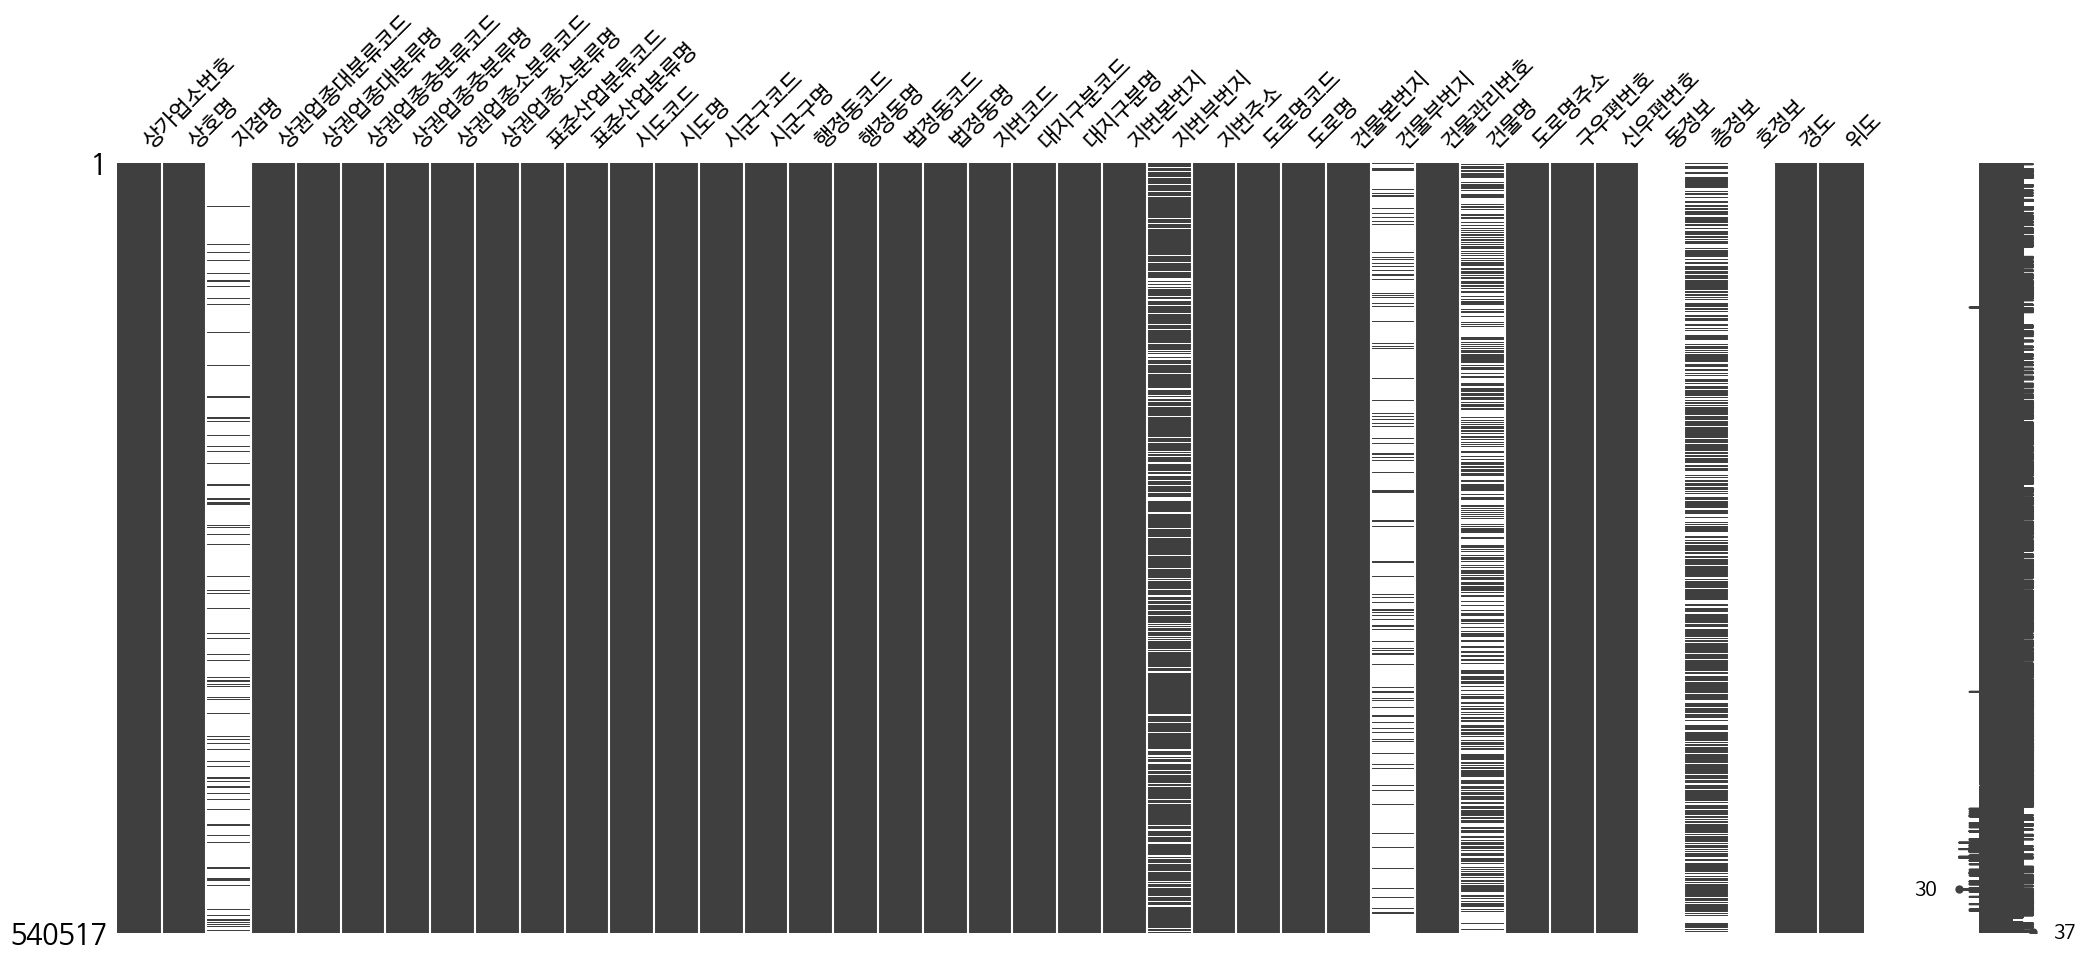

In [19]:
msno.matrix(df)

In [20]:
df['상권업종대분류명'].value_counts()

,count
상권업종대분류명,
음식,139929
소매,113485
과학·기술,94149
수리·개인,50986
교육,44627
부동산,25000
시설관리·임대,24734
예술·스포츠,20416
보건의료,18494


In [21]:
df['상권업종중분류명'].value_counts()

,count
상권업종중분류명,
한식,49988
이용·미용,29947
기타 간이,28228
섬유·의복·신발 소매,26935
부동산 서비스,25000
...,...
장례식장,472
모터사이클 소매,436
통신장비 수리,332


<Axes: xlabel='count', ylabel='상권업종대분류명'>

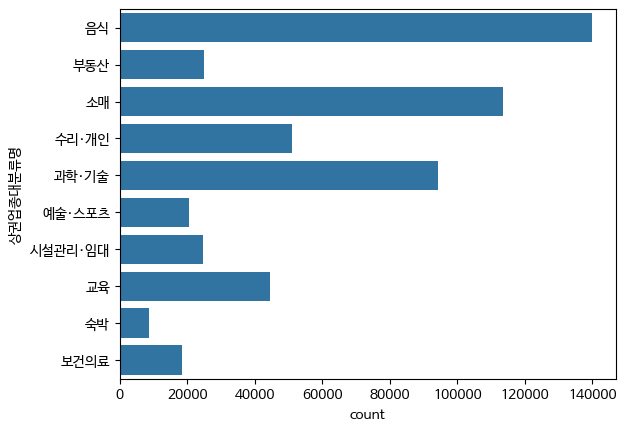

In [22]:
sns.countplot(data=df, y='상권업종대분류명')

In [23]:
# df['상권업종대분류명']=='음식'    VS  df['상권업종대분류명'].str.contains('음식')  서로 같다
#df[df['상권업종대분류명']=='음식']

df_food = df.loc[df['상권업종대분류명'].str.contains('음식')]
df_food.shape

(139929, 39)

In [24]:
df_food.head()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,MA010120220800000033,부동산임대김은숙,NaN,I2,음식,I212,비알코올,I21201,카페,I56229,...,1111014000100280021026727,NaN,서울특별시 종로구 삼청로 122-1,110230,3053,NaN,NaN,NaN,126.981840,37.586250
3,MA010120220800000084,고향집,NaN,I2,음식,I201,한식,I20101,백반/한정식,I56111,...,1111015400100800000000001,NaN,서울특별시 종로구 돈화문로4길 30,110430,3193,NaN,NaN,NaN,126.993820,37.570025
18,MA010120220800000419,착한생오리,NaN,I2,음식,I201,한식,I20110,닭/오리고기 구이/찜,I56113,...,1135010500101690014002247,NaN,서울특별시 노원구 한글비석로24길 13,139815,1668,NaN,1,NaN,127.071559,37.661552
29,MA010120220800000302,한옥,NaN,I2,음식,I212,비알코올,I21201,카페,I56229,...,1111012800100640000013474,NaN,서울특별시 종로구 인사동12길 9,110300,3146,NaN,1,NaN,126.984797,37.574601
31,MA010120220800000338,양모리양대창,NaN,I2,음식,I201,한식,I20109,곱창 전골/구이,I56111,...,1165010100108510006009319,NaN,서울특별시 서초구 방배로 174,137837,6586,NaN,NaN,NaN,126.993057,37.489178


In [25]:
df_food['상권업종대분류명'].unique()

array(['음식'], dtype=object)

<Axes: xlabel='count', ylabel='상권업종중분류명'>

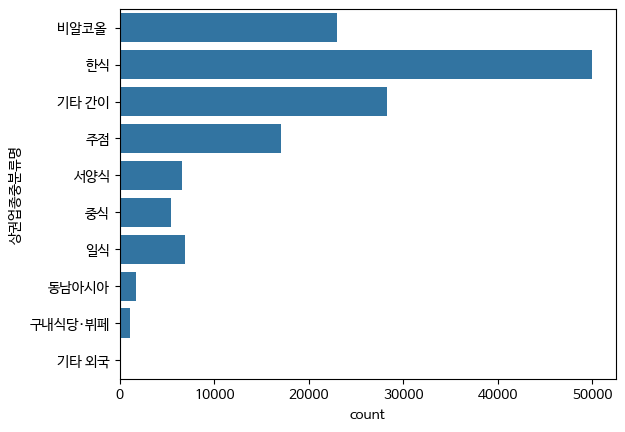

In [26]:
sns.countplot(data=df_food, y='상권업종중분류명')

### 이디야와 할리스

In [27]:
df.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

In [28]:
dataset = df[['상호명', '지점명', '상권업종중분류명', '시도명', '시군구명', '행정동명', '도로명', '경도', '위도']]
dataset.head()

# '비알코올' 뒤에 공백이 있으므로 주의하세요
df_coffee = dataset[dataset['상권업종중분류명']=='비알코올 ']
df_coffee.head()

,상호명,지점명,상권업종중분류명,시도명,시군구명,행정동명,도로명,경도,위도
0,부동산임대김은숙,NaN,비알코올,서울특별시,종로구,삼청동,서울특별시 종로구 삼청로,126.981840,37.586250
29,한옥,NaN,비알코올,서울특별시,종로구,종로1.2.3.4가동,서울특별시 종로구 인사동12길,126.984797,37.574601
66,화동커피,NaN,비알코올,서울특별시,종로구,삼청동,서울특별시 종로구 율곡로3길,126.982271,37.579313
73,우궁옛날전통찻집,NaN,비알코올,서울특별시,종로구,종로1.2.3.4가동,서울특별시 종로구 인사동4길,126.986654,37.573231
97,상록,NaN,비알코올,서울특별시,종로구,종로1.2.3.4가동,서울특별시 종로구 종로17길,126.988556,37.572430


In [29]:
df_coffee['상권업종중분류명'].unique()

array(['비알코올 '], dtype=object)

In [30]:
print(df_coffee['상호명'])

0              부동산임대김은숙
29                   한옥
66                 화동커피
73             우궁옛날전통찻집
97                   상록
              ...      
540449              이디야
540460             커피트립
540482    메가엠지씨커피쌍문세라믹점
540495     투썸플레이스신정뉴타운점
540501              소르르
Name: 상호명, Length: 22945, dtype: object


In [31]:
df_coffee['상호명'].value_counts()

,count
상호명,
투썸플레이스,75
이디야,66
이디야커피,65
메가엠지씨커피,63
컴포즈커피,49
...,...
보통의,1
노이에아트멍,1
하우양재역점,1


In [32]:
print(sorted(list(set(df_coffee['상호명']))))

["'빈입니다'", '000케이크바', '0122커피바', '0125커피바', '01팩토리', '025베이커리', '09커피', '1%리버티커피', '1.5도씨', '100X커피', '100디그리', '101빌리지', '101스트릿노블레르점', '101커피', '101커피컨테이너', '101커피컨테이너국제전자', '101파트너스', '1028커피엔디저트', '106길15', '10꼬르소꼬모', '10꼬르소꼬모카페', '10스퀘어남산', '11월', '120겹파이', '121호', '132하우스', '139커피', '13포레스트', '1441카페로스터스', '14번가', '153카페', '15아지트', '175도씨', '17도씨', '17번지넘버링', '1847카페', '193씨엠', '1980벽돌집', '1992카페', '1999커피', '1달러커피', '1리터SELL앤디저트와플신림', '1인1잔', '1한가로이', '2.카페', '207', '208도씨', '208호', '210커피', '213점', '214베이커스트리트', '21세기복덕방', '221B', '22그램', '230', '237플랫폼카페', '24/7', '24CAFE33커피상왕십리역', '24시만화카페', '24시무인까페만월경병무청역점', '24시무인까페만월경서리풀점', '24시무인셀프카페', '24시무인셀프카페원효로점', '24시무인카페', '24시무인카페RO', '24시무인카페만월경', '24시무인카페만월경&음악연습실', '24시무인카페만월경노원마들역점', '24시무인카페만월경면', '24시무인카페만월경상계', '24시무인카페만월경수락산역점', '24시무인카페만월경점', '24시무인카페만월경창동건영점', '25그램', '25브릭스', '26;샵', '26카페', '280커피로스터스', '282독', '29커피', '2라운드', '2층사무실', '2층집', '2카페', '301에이치', '312스튜디오', '317베이크샵', '33마켓', '33아파트먼트', '33카페', '36.5도씨여름

In [33]:
df_coffee[df_coffee['상호명'].str.contains('이디야|ediya|EDIYA')].shape

(488, 9)

In [34]:
df_coffee[df_coffee['상호명'].str.contains('할리스|hollys|HOLLYS')].shape

(127, 9)

In [35]:
df_coffee.loc[df_coffee['상호명'].str.contains('이디야|ediya|EDIYA'),'상호명'].unique()

array(['이디야커피', '이디야다동점', '이디야연남동점', '이디야한국', '이디야회현SK리더스점', '이디야퇴계로2길점',
       '이디야홈플러스', '이디야커피합정LIG점', '이디야화곡로점', '이디야', '이디야라이프점', '이디야커피영등포',
       '이디야주', '이디야커피해군회관점', '이디야커피삼성', '이디야커피노량진CTS점', '이디야응암',
       '이디야중곡대원점', '이디야커피천호초교', '이디야커피여의도역점', '이디야커피신도림테크노마트점', '이디야커피성동',
       '이디야커피내방역점', '이디야커피보라매공원점', '이디야커피신림패션', '이디야커피구로거리공원점',
       '이디야에스프레소', '이디야목3동점', '이디야신림', '이디야커피사가정', '이디야커피한티역점',
       '이디야영등포그랜드점', '이디야커피목동신목점', '이디야혜화역점', '이디야불광', '이디야커피도림점',
       '이디야커피신길역점', '이디야서소문점', '이디야장안중랑천점', '이디야커피강서한강자이', '이디야망원',
       '이디야커피공릉역점', '이디야합정역', '이디야합정동점', '이디야커피아이온스퀘어', '이디야종로',
       '이디야안암래미안점', '이디야커피신림대', '이디야을지로', '이디야커피명동역점', '이디야중곡',
       '이디야커피선덕고', '이디야커피답십리', '이디야월계인덕점', '이디야커피배봉초교', '이디야장안동',
       '이디야사가정점', '이디야커피회기', '이디야시립대점', '이디야마장역점', '이디야커피점신금호역점', '이디야성수',
       '이디야커피촬영소', '이디야남구로역점', '이디야동덕여대점', '이디야카페정릉아리랑점', '이디야월곡동아점',
       '이디야커피길동역점', '이디야거여역점', '이디야올림픽공원점', '이디야양재언남점', '이디야대림역점',
       '이디야서울', '이디야전문대점', '이디야커피중계롯데우성점',

In [50]:
df_coffee.loc[df_coffee['상호명'].str.contains('할리스|hollys|HOLLYS'),'상호명'].unique()

array(['할리스엘지리테일주', '할리스커피충정래미안', '할리스커피', '할리스커피이수역점',
       '모닝에프디(할리스커피노량진역점)주', '할리스커피난곡', '할리스커피구로역점', '할리스커피도심', '할리스커피남부',
       '할리스도심2', '할리스독립문역점', '할리스커피테크노마트점', '서울고무상사할리스종로5가점', '할리스',
       '케이지할리스에프앤비', '할리스커피굽은다리역점', '할리스고덕리엔파크점', '할리스가산디지털단지점',
       '할리스커피무악재역점', '할리스방이역점', '할리스명동퍼시픽호텔점', '할리스청담삼성로점', '할리스가맹',
       '할리스커피수락산역점', '할리스커피백석예술대학교점', '할리스커피강남대로논현', '할리스커피홍대역2번',
       '할리스커피홍대역점', '할리스개화산점', '할리스샹제리제점', '할리스대방역점', '할리스커피구로거리공원점',
       '할리스커피역사문화공원점', '할리스커피선유도역점TS카페', '할리스커피수서점', '할리스커피구로디지털뉴스테이점',
       '할리스신림역점', '할리스고덕그라시움', '할리스커피수유', '할리스커피장승배기역점', '할리스숙대',
       '할리스목동삼성쉐르빌점', '할리스시흥', '할리스가산대륭2', '할리스노원역점', '할리스강변역점',
       '할리스등촌역점', '할리스커피왕십리역점', '할리스신대방삼거리역점', '할리스서서울공원점', '할리스메리츠봉래',
       '할리스명동역점', '할리스충무로점', '할리스커피서대문농협생명빌딩점', '할리스커피클럽역삼테헤란점',
       '할리스커피센터포인트점', '할리스커피서울대예술', '할리스커피신촌연세로점', '할리스커피구반포역점',
       '할리스커피홍대입구역점', '할리스커피신사역', '할리스커피종로', '할리스커피종로DGB점', '할리스커피세로수길점',
       '할리스커피광나루역점', '할리스커피전경련회관점', '할리스청계천점', '할리

In [37]:
# 이디야와 할리스 데이터 가져오기
df_coffee_edi_holly =  df_coffee.loc[df_coffee['상호명'].str.contains('이디야|ediya|EDIYA|할리스|hollys|HOLLYS')].copy()
df_coffee_edi_holly.shape

(615, 9)

In [38]:
df_coffee_edi_holly.sample(5)

,상호명,지점명,상권업종중분류명,시도명,시군구명,행정동명,도로명,경도,위도
246646,이디야커피올림픽,프라자점,비알코올,서울특별시,송파구,오륜동,서울특별시 송파구 양재대로,127.131064,37.515730
407349,이디야양평동2가점,NaN,비알코올,서울특별시,영등포구,양평1동,서울특별시 영등포구 선유서로25길,126.883943,37.524503
518523,이디야신촌숲,아이파크점,비알코올,서울특별시,마포구,신수동,서울특별시 마포구 광성로,126.935518,37.550320
265525,할리스커피구로거리공원점,NaN,비알코올,서울특별시,구로구,구로5동,서울특별시 구로구 구로중앙로28길,126.888675,37.499811
153560,이디야,잠실점,비알코올,서울특별시,송파구,잠실3동,서울특별시 송파구 송파대로,127.093055,37.513135


In [51]:
# 상호명에 이디야가 포함된 것에 브랜드명 컬럼명을 추가하고 '이디야'을 저장한다.
df_coffee_edi_holly.loc[df_coffee_edi_holly['상호명'].str.contains('이디야|ediya|EDIYA'),'브랜드명'] ='이디야'

In [52]:
# 상호명에 이디야가 포함된 것에 브랜드명 컬럼명을 추가하고 '할리스'을 저장한다.
df_coffee_edi_holly.loc[df_coffee_edi_holly['상호명'].str.contains('할리스|hollys|HOLLYS'),'브랜드명'] ='할리스'

In [53]:
df_coffee_edi_holly.sample(5)

,상호명,지점명,상권업종중분류명,시도명,시군구명,행정동명,도로명,경도,위도,브랜드명
247607,이디야커피난곡,사거리점,비알코올,서울특별시,관악구,미성동,서울특별시 관악구 남부순환로,126.911259,37.480927,이디야
321681,이디야,아차산역점,비알코올,서울특별시,광진구,구의2동,서울특별시 광진구 천호대로,127.090251,37.551817,이디야
285134,이디야고덕교차로,NaN,비알코올,서울특별시,강동구,강일동,서울특별시 강동구 고덕로,127.172571,37.557402,이디야
531880,할리스커피서울대,병원점,비알코올,서울특별시,종로구,이화동,서울특별시 종로구 대학로,126.997204,37.580458,할리스
530932,할리스커피센터포인트점,NaN,비알코올,서울특별시,종로구,사직동,서울특별시 종로구 새문안로5길,126.974360,37.572977,할리스


In [42]:
df_coffee_edi_holly['브랜드명'].unique()

array(['이디야', '할리스'], dtype=object)

In [43]:
df_coffee_edi_holly['브랜드명'].value_counts()

,count
브랜드명,
이디야,488
할리스,127


In [44]:
geo_df_coffee =  df_coffee_edi_holly.copy()

In [45]:
#!pip install folium

In [46]:
import folium

In [47]:
folium.Map

folium.folium.Map

In [55]:
# map = folium.Map(location=[geo_df_coffee['위도'].mean(), geo_df_coffee['경도'].mean()],
#           zoom_start=12, tiles='OpenStreetMap')  # tiles='OpenStreetMap'

map = folium.Map(location=[35.115211, 129.040639],
           zoom_start=12, tiles='OpenStreetMap')  # tiles='OpenStreetMap'

for n in geo_df_coffee.index:
  #팝업에 들어갈 텍스트를 지정해 준다.
  popup_name=geo_df_coffee.loc[n,'상호명'] + ' - '\
  +geo_df_coffee.loc[n, '도로명']

  if geo_df_coffee.loc[n,'브랜드명']=='이디야':
    icon_color='blue'
  else:
    icon_color='red'

  folium.CircleMarker(
      location=[geo_df_coffee.loc[n, '위도'],geo_df_coffee.loc[n,'경도']],
      radius = 3,
      popup =popup_name,
      color = icon_color,
      fill=True,
      fill_color=icon_color
  ).add_to(map)


In [56]:
map